# Principal Component Analysis


## Genrating the data 

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Generate a dataset in 2 dimension by sampling points from a multi-varite normal distribution.   

What is multi-varite normal distributio?

rng = np.random.default_rng()   
*creates a new, independent random number generator for safely and efficiently producing random numbers using NumPy’s modern Generator class*.

In [26]:
rng = np.random.default_rng(seed=42)
#random number genrator 


*In the function generate(mu, cov, n),*

-  *mu is a 1D array representing the mean (center) of the multivariate normal distribution,*

-  *cov is a 2D array (matrix) representing the covariance (spread and correlation) between variables, and*

-  *n is the number of random samples to generate from that distribution.*

In [27]:
def generate(mu , cov , n):
    X = rng.multivariate_normal(mu , cov , n).T
    return X

In [28]:
mu = np.array([2,5])
cov = np.array([[1,0.9],
               [0.9,1]])
n = 100

In [29]:
X = generate(mu , cov , n)
X

array([[ 1.93554604e+00,  1.05823399e+00,  4.19281006e+00,
         1.94611058e+00,  2.20712216e+00,  9.68949315e-01,
         1.68358244e+00,  1.73647189e+00,  1.85499886e+00,
         1.15495633e+00,  2.33244202e+00,  8.42967942e-01,
         2.49622178e+00,  1.39945341e+00,  1.50138351e+00,
         3.45728790e-03,  2.68123757e+00,  1.14717165e+00,
         2.29892694e+00,  2.65812792e+00,  1.15411246e+00,
         2.59674578e+00,  1.83736848e+00,  1.10063881e+00,
         1.32316577e+00,  1.57704093e+00,  3.49174047e+00,
         2.60131998e+00,  1.93389645e+00,  2.62739416e+00,
         3.71514113e+00,  1.71028464e+00,  1.12938424e+00,
         2.44328016e+00,  1.20652550e+00,  3.49679595e+00,
         2.78500271e+00,  1.70678335e+00,  2.38098382e+00,
         1.45942190e+00,  1.70280171e+00,  2.43922031e+00,
         3.05666995e+00,  2.45472304e+00,  1.43157871e+00,
         1.37348484e+00,  2.43040569e+00,  3.96819436e+00,
         3.51219928e+00,  1.81281955e+00,  2.07807099e+0

In [30]:
X.shape

(2, 100)

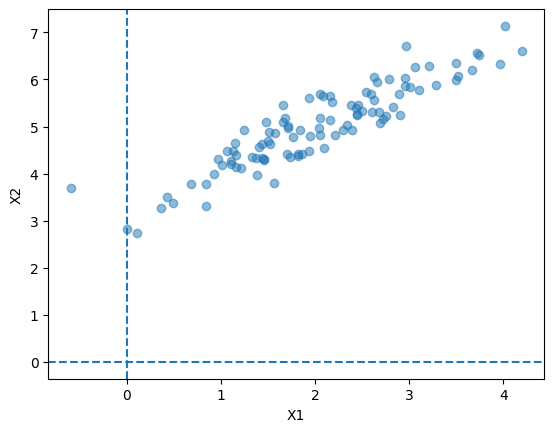

In [31]:
def plot(X):
    plt.scatter(X[ 0 ,: ],X[1 , : ],alpha= .5) #range of alph is 0-1      0--- Transparent 1 --- dark 
    plt.axhline(linestyle = '--')
    plt.axvline(linestyle = '--')
    plt.xlabel('X1')
    plt.ylabel('X2')
plot(X)

## Try 

Variation in N  
    
       
          

N = 10 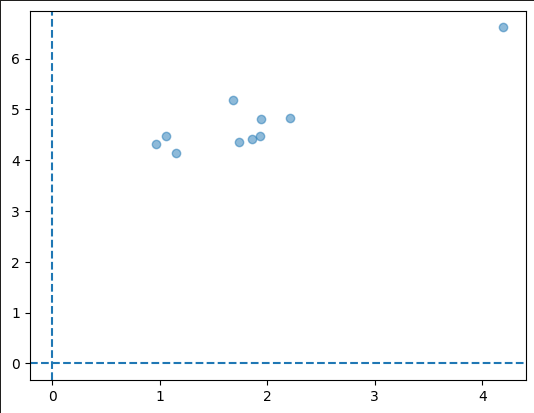  N=20 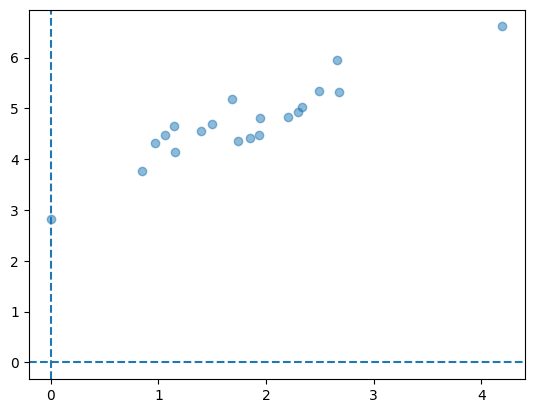 N = 50 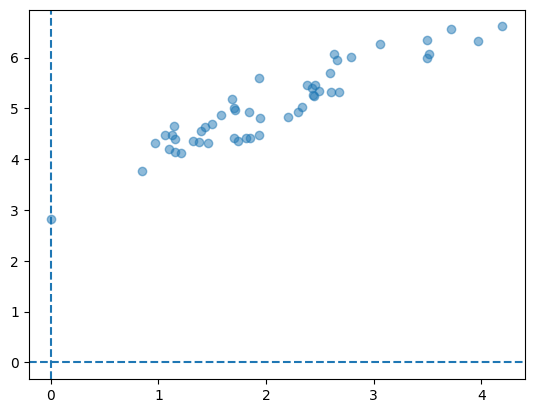 N = 100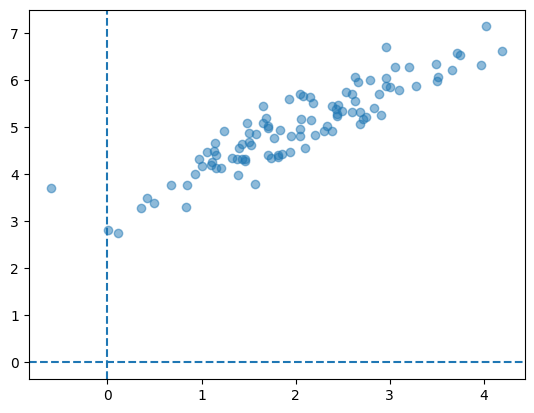 N= 500 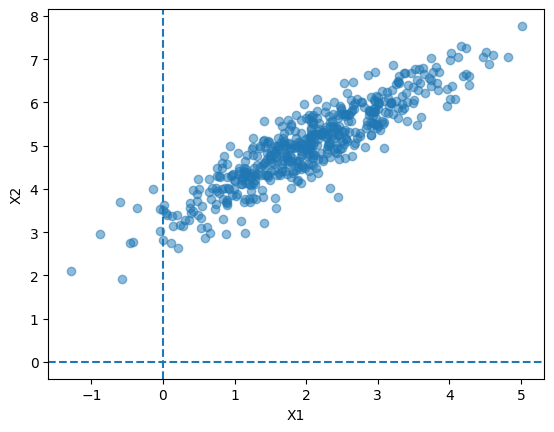 N = 1000 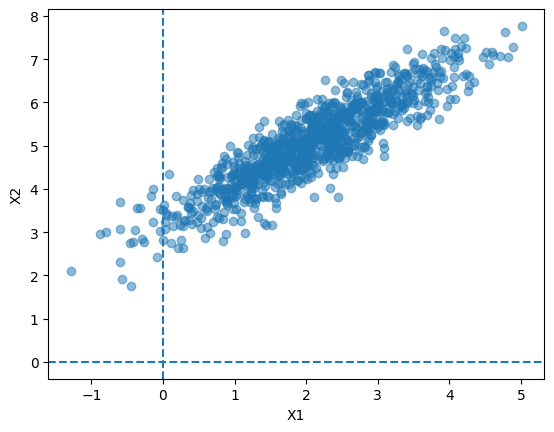        

        
         
     
         
             


             -------------------------------------------------------------------------------------------------------





variation in mu

Without centering   

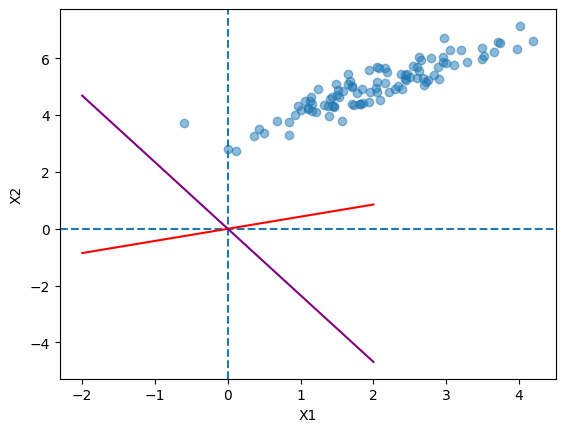

## Centering the dataset

In [43]:
def center(X):
    mu = X.mean(axis = 1)
    X = X - mu.reshape(2,1)
    return X
X = center(X)


## covariance matrix

In [38]:
def covariance(x):
    d , n = x.shape
    return x @ x.T /n

C = covariance(X)
C
    

array([[ 4.97156601, 10.87858843],
       [10.87858843, 25.80680066]])

## Principal components

In [42]:
def get_PC(C):
    eigval , eigvec = np.linalg.eigh(C)
    eigval = np.flip(eigval)
    eigvec = np.flip(eigvec , axis = 1)
    return eigval , eigvec

var , pcs = get_PC(C)

print('First Principal Component', pcs[: , 0])
print('Second Principal Component' , pcs[: , 1])

print('Variance along first PC:' ,var[0])
print('Variance along first PC:' ,var[0] )


First Principal Component [0.39265828 0.91968444]
Second Principal Component [-0.91968444  0.39265828]
Variance along first PC: 30.45140219929248
Variance along first PC: 30.45140219929248


In [ ]:
print(pcs) #dimension 2x2

[[ 0.39265828 -0.91968444]
 [ 0.91968444  0.39265828]]


In [ ]:
print(var) #dimension 1x2

[30.4514022   0.32696447]


## PCA visualization

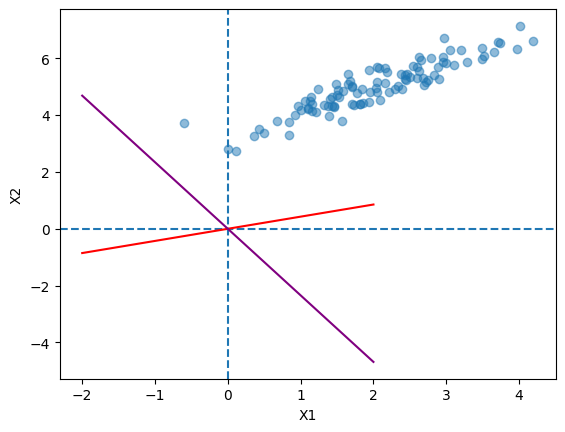

In [35]:
plot(X)
x = np.linspace(-2,2)
plt.plot(x , pcs[:, 0][0]/pcs[:, 0][1]*x  , color = 'red' , label = 'PC-1')
plt.plot(x , pcs[:, 1][0]/pcs[:, 1][1]*x  , color = 'purple' , label = 'PC-2')

In [46]:
print(pcs[: , 0])
print(pcs[:, 0][0])
print(pcs[: , 0][1]) 

[0.39265828 0.91968444]
0.39265827645608015
0.919684444758386
